In [24]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [25]:
result_path = '../pipeline-revision/results/nsyb-G7f-rAch1h'
sub_path = 'each_region_L-DEEPCAD-formal'
acc_file = 'list_accuracy_each_region.npy' 
num_dim_file = 'list_num_dim.npy'
 
thresh = np.arange(0,1,0.02)
channel = np.array([0,1,2])
num_channel_choice = len(channel)
num_region = 9
odor_selected = 0
if_shuffle = False
if_save = True
if_save_each_fly = False
if if_save:
    figure_save_path = './results/' + 'p2_thresh/ACh'
    folder = os.path.exists(figure_save_path)
    if not folder:
        os.makedirs(figure_save_path)
if if_save_each_fly:
    figure_save_subpath = './results/' + 'p2_thresh'+'/p2_thresh_each_fly'
    folder = os.path.exists(figure_save_subpath)
    if not folder:
        os.makedirs(figure_save_subpath)
# ach
fly_selected = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(fly_selected)
c = ['orange','#006934','#751C77']
LH_none = [4]
# # 5ht
# fly_selected = [0,1,2,3,4,5,6,7,8,9]
# num_fly = len(fly_selected)
# c = ['orange','#006934','#036EB8']
# LH_none = [7]

In [26]:
# read each region data
file_folders = os.listdir(result_path)
print(file_folders)
data_acc = []
num_dim = []
for i in range(num_fly):
    the_path = result_path + '/' + file_folders[fly_selected[i]] + '/'\
               + sub_path + '/' + acc_file
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    a = np.squeeze(a)
    a = a[:,odor_selected,:,:,:,:]
    acc = np.mean(a,3)
    the_path = result_path + '/' + file_folders[fly_selected[i]] + '/'\
               + sub_path + '/' + num_dim_file
    a = np.load(the_path)
    dim = np.squeeze(a)
    dim = dim[:,odor_selected,:,:,:]
    if if_shuffle:
        acc = np.squeeze(acc[:,:,:,1])
        dim = np.squeeze(dim[:,:,:,1])
    else:
        acc = np.squeeze(acc[:,:,:,0])
        dim = np.squeeze(dim[:,:,:,0])
    data_acc.append(acc)
    num_dim.append(dim)
data_acc = np.array(data_acc)
print(np.shape(data_acc))
num_dim = np.array(num_dim)
print(np.shape(num_dim))

data_acc = data_acc*100

['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1', 'figures-for-revision1']
(10, 3, 9, 50)
(10, 3, 9, 50)


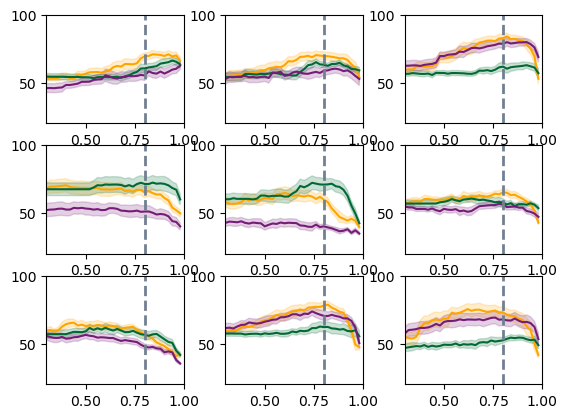

In [27]:
# mean
plt.figure()
grid = plt.GridSpec(3,3, wspace=0.3, hspace=0.2)
for i in range(np.size(data_acc,2)):# every region
    plt.subplot(grid[int(i/3),i%3])
    for j in range(np.size(data_acc,1)):# every channel
        a = data_acc[:,j,i,:]
        if i==3:# LH
            ind = []
            for k in range(len(fly_selected)):
                if fly_selected[k] not in LH_none:
                    ind.append(k)
            # print(ind)
            if len(ind)>0:
                a = a[np.array(ind),:]
            else:
                continue
        the_mean = np.mean(a,0)
        the_std = np.std(a,0,ddof = 1)/math.sqrt(np.size(a,0))
        the_mean_below = the_mean-the_std
        the_mean_above = the_mean+the_std
        x_fill = np.concatenate((thresh,thresh[::-1]),axis = 0)
        y_fill = np.concatenate((the_mean_below,the_mean_above[::-1]),axis = 0)
        plt.plot(thresh,the_mean,color = c[j])
        plt.fill(x_fill,y_fill,color = c[j],alpha=0.2)
    plt.plot([0.8,0.8],[20,100], '--', linewidth=2, markersize=6, color='slategray')
    plt.ylim((20,100))
    plt.xlim((0.3,1))
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 'supp_p2_accuracy_thresh_curve_mean.png',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + 'supp_p2_accuracy_thresh_curve_mean.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()

In [28]:
# # each fly - x-thresh
# for k in range(len(fly_selected)):
#     plt.figure()
#     grid = plt.GridSpec(3,3, wspace=0.2, hspace=0.2)
#     for i in range(np.size(data_acc,2)):
#         plt.subplot(grid[int(i/3),i%3])
#         for j in range(np.size(data_acc,1)):
#             a = data_acc[k,j,i,:]
#             plt.plot(thresh,a,color = c[j])
#         plt.plot([0.8,0.8],[0,100], '--', linewidth=2, markersize=6, color='slategray')
#         plt.ylim((0,100))
#     if if_save_each_fly:
#         mpl.rcParams['pdf.fonttype'] = 42
#         mpl.rcParams['ps.fonttype'] = 42
#         plt.savefig(figure_save_subpath + '/' + 'p2_accuracy_thresh_curve_x_thresh_' + file_folders[fly_selected[k]] + '.png',dpi = 300,bbox_inches = 'tight')
#         plt.savefig(figure_save_subpath + '/' + 'p2_accuracy_thresh_curve_x_thresh_' + file_folders[fly_selected[k]] + '.pdf',dpi = 300,bbox_inches = 'tight')
#     plt.show()